In [42]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/telescope_data.csv")
df.head()


Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist  class  
0   -8.2027  40.0920   81.8828      1  
1   -9.9574   6.3609  205.2610      1  
2  -45.2160  76.9600  256.7880      1  
3   -7.1513  10.4490  116.7370      1  
4   21.8393   4.6480  356.4620      1

In [4]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fAlpha','fDist']

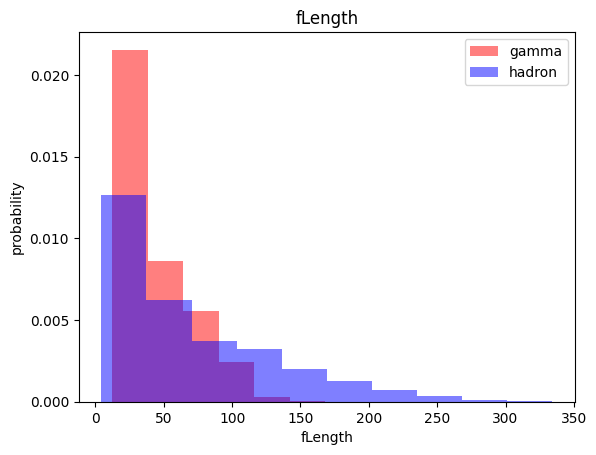

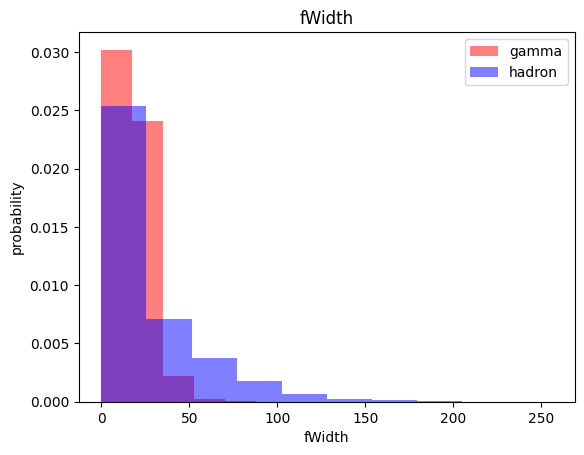

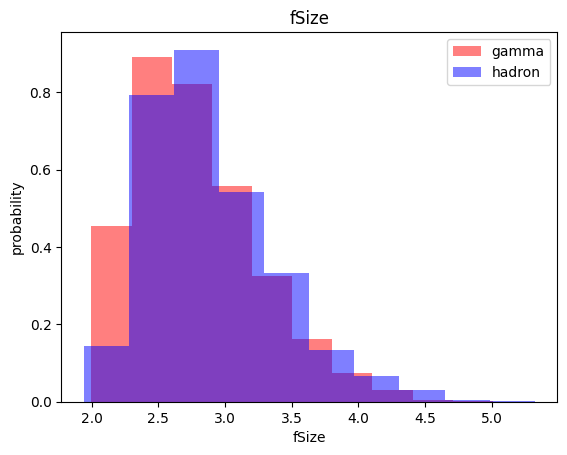

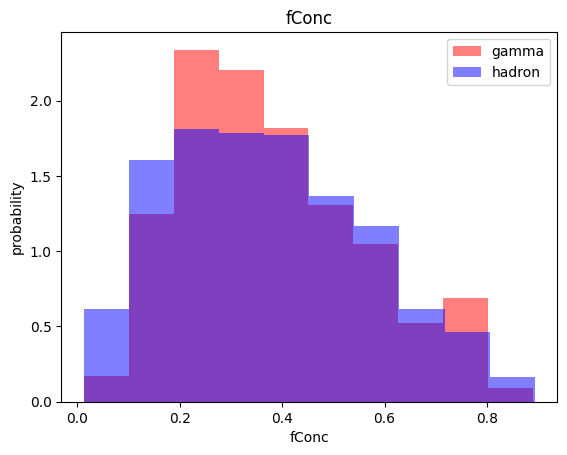

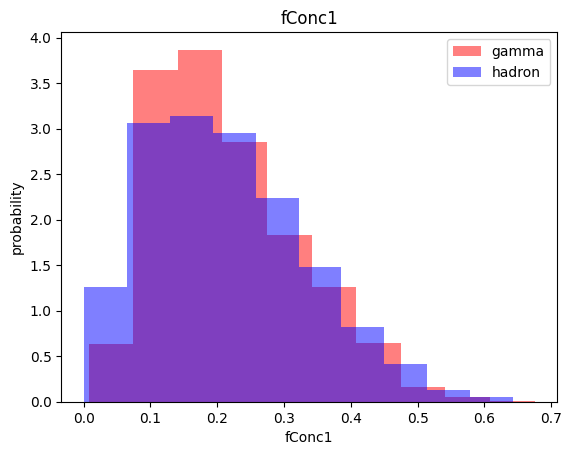

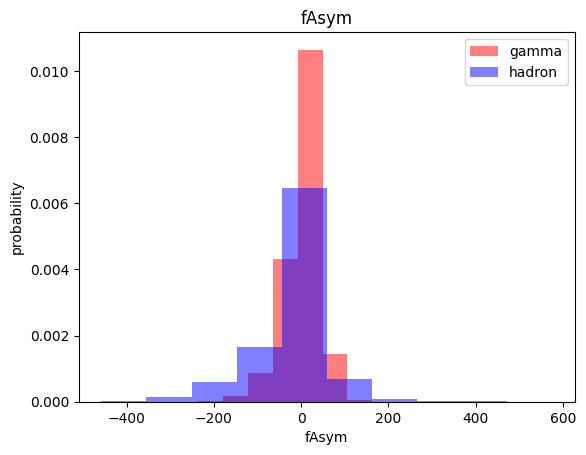

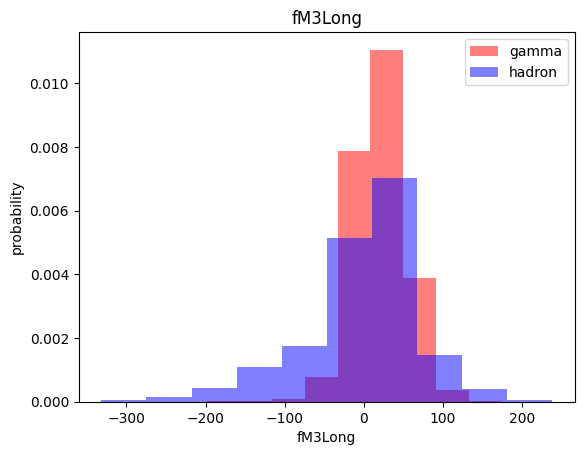

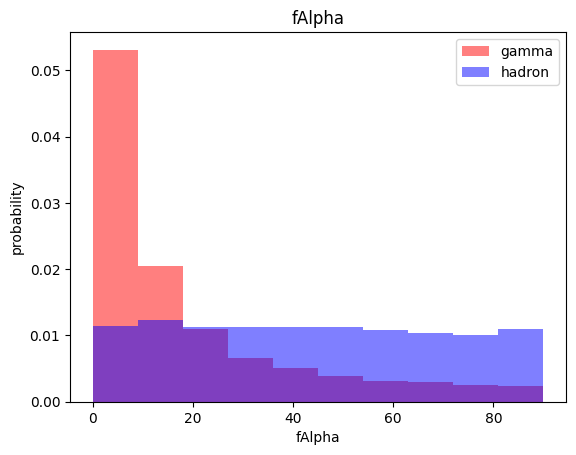

In [5]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label],color = 'red',label = 'gamma',alpha = 0.5,density = True)
    plt.hist(df[df['class'] == 0][label],color = 'blue',label = 'hadron',alpha = 0.5,density = True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [9]:
print(train)

[[ 0.67423971  0.35535839  1.85083549 ... -0.77264788  1.99169575
   0.        ]
 [-0.49547538 -0.43390781 -0.08955132 ...  0.39849234 -0.90982277
   1.        ]
 [ 1.02634315  2.54988405  1.48753488 ...  0.23990641 -0.10111378
   0.        ]
 ...
 [ 1.32393916  2.19254601  0.74328817 ... -0.1845482   2.11329259
   0.        ]
 [ 1.29814872 -0.67567231 -0.80014234 ...  0.43675349 -1.56349423
   0.        ]
 [ 1.54452968 -0.85433535 -0.62922263 ... -0.32547308 -0.44571214
   0.        ]]


In [10]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

14938
14938
3804
3804


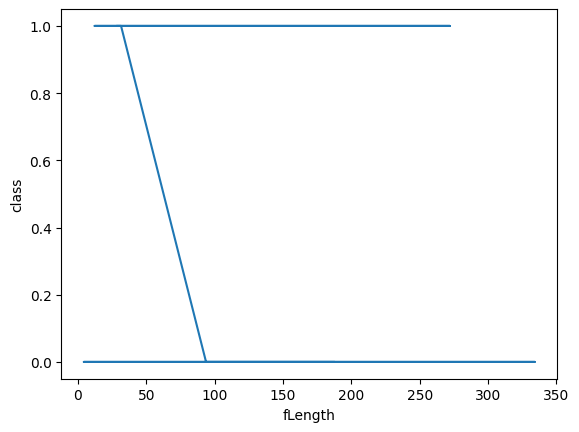

In [17]:
x2 = df['fLength']
y1 = df['class']
import matplotlib .pyplot as plt
plt.xlabel('fLength')
plt.ylabel('class')
plt.plot(x2,y1)
plt.show()

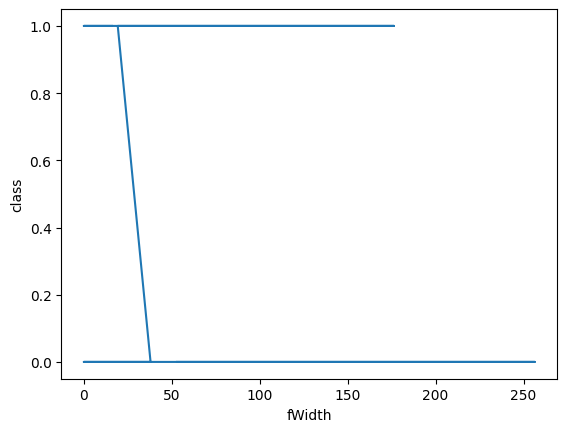

In [18]:
x2 = df['fWidth']
y2 = df['class']
import matplotlib .pyplot as plt
plt.xlabel('fWidth')
plt.ylabel('class')
plt.plot(x2,y2)
plt.show()

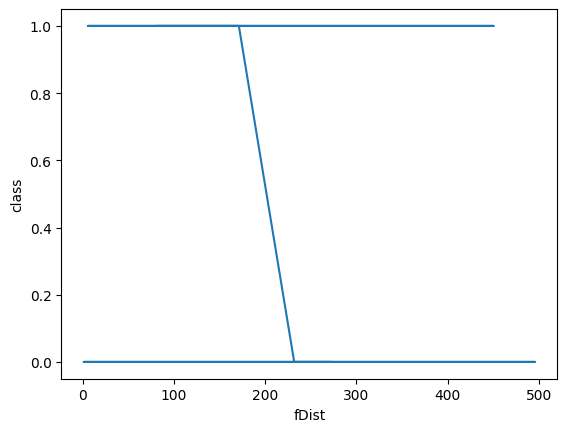

In [19]:
x2 = df['fDist']
y3= df['class']
import matplotlib .pyplot as plt
plt.xlabel('fDist')
plt.ylabel('class')
plt.plot(x2,y3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
yp=[]
 #implementing perceptron model
def perceptron(w,x1,b):
  q=0
  for i in range(len(x1)):
    for j in range(len(w)):
      s=(x1[i][j]*w[j])+b
      s2=1/(1+np.exp(-s))
      if(s2>=0.5):
        yp.append(1)
      else:
        yp.append(0)
    q=q+1
  print(q)
  return yp
w=[]
#print("enter weights w : ")
w=[0.3,0.2,0.6,0.1,0.2,0.8,0.2,0.8,0.9,0.3]
b= float(input("enter b:"))
perceptron(w,X_train,b)


In [21]:
# Assuming you have the true labels for your data
# Assuming you have the true labels for your data
#true_labels = [1, 0, 1]  # Replace with your actual true labels

# Calculate accuracy
predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
total_predictions = len(y)
accuracy = predictions / total_predictions

print("Accuracy:" ,accuracy)



Accuracy: 0.6355415352260778


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
yp=[]
 #implementing perceptron model

def perceptron(w,x1,b):
    q=0
    for i in range(len(x1)):
       for j in range(len(w)):
          s=(x1[i][j]*w[j])+b
          s2=1/(1+np.exp(-s))
          if(s2>=0.5):
             yp.append(1)
          else:
             yp.append(0)
    q=q+1
    return yp
accuracy_list = []
#print("enter weights w : ")
num_iter = 8
import random
for i in range(num_iter):
    w = []
    yp=[]
    for j in range(10):
        val = random.uniform(0.0,1.0)
        w.append(val)
    #print(w)
    b = random.uniform(0.0,1.0)
    yp = perceptron(w,X_train,b)
    print(yp)
    predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
    total_predictions = len(y)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)




[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

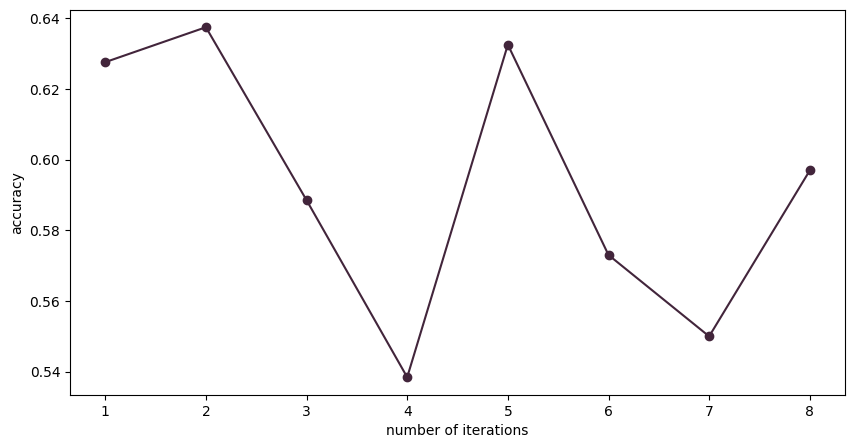

In [23]:
num_iterations= [1,2,3,4,5,6,7,8]
plt.figure( figsize = ( 10 , 5 ) )
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
# Accuracy scores plot obtained from above iterations
plt.plot(num_iterations, accuracy_list, label = 'Accuracy', marker = 'o', color = '#42253B')

In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Create a Perceptron instance and fit the training data
clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_PM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_PM)
print(classification_report(y_test, y_pred))

[1 1 0 ... 0 0 1]
Accuracy: 0.9960567823343849
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1344
           1       1.00      1.00      1.00      2460

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



In [25]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cost after iteration 0: 0.6899852556357456
Cost after iteration 100: 0.4916191675181084
Cost after iteration 200: 0.39830363065064023
Cost after iteration 300: 0.34328346475497
Cost after iteration 400: 0.3066706096077888
Cost after iteration 500: 0.2803117286407942
Cost after iteration 600: 0.2602646936343191
Cost after iteration 700: 0.24439460863635948
Cost after iteration 800: 0.23144363142478497
Cost after iteration 900: 0.22062100648553723
 [0.6899852556357456, 0.6868600198397761, 0.6837709060134968, 0.6807173521905058, 0.6776988019446994, 0.674714704709086, 0.6717645160659514, 0.6688476980091874, 0.6659637191796665, 0.6631120550746302, 0.6602921882321044, 0.6575036083914083, 0.6547458126308567, 0.6520183054837765, 0.6493205990339747, 0.6466522129917995, 0.6440126747519321, 0.6414015194340387, 0.6388182899073928, 0.6362625368005601, 0.6337338184972079, 0.6312317011190707, 0.6287557584970758, 0.6263055721315852, 0.6238807311426835, 0.6214808322113934, 0.619105479512662, 0.61675428

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Importing logistic regression function from scikit learn directly

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_LR)
print(classification_report(y_test, y_pred))

[1 1 0 ... 0 0 1]
Accuracy is: 0.9957939011566772
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1344
           1       1.00      1.00      1.00      2460

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



In [28]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

[1 1 0 ... 0 0 1]
Accuracy: 0.9968454258675079
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1344
           1       1.00      1.00      1.00      2460

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))

[1 1 0 ... 0 0 1]
Accuracy is : 0.9734490010515248
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1344
           1       0.98      0.98      0.98      2460

    accuracy                           0.97      3804
   macro avg       0.97      0.97      0.97      3804
weighted avg       0.97      0.97      0.97      3804



In [47]:
from sklearn.utils import resample
# Define the machine learning model
model = LogisticRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_lgr.append(score)

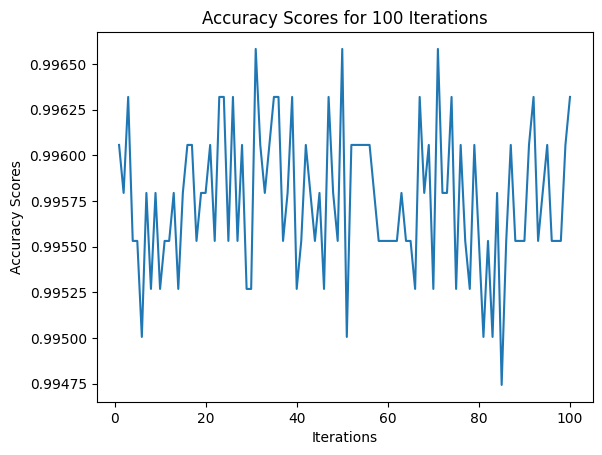

In [48]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in logistic regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [32]:
# Calculate the confidence interval in logistic regression
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 99.5% and 99.6%


In [49]:
from sklearn.utils import resample
# Define the machine learning model
model = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_per = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_per.append(score)

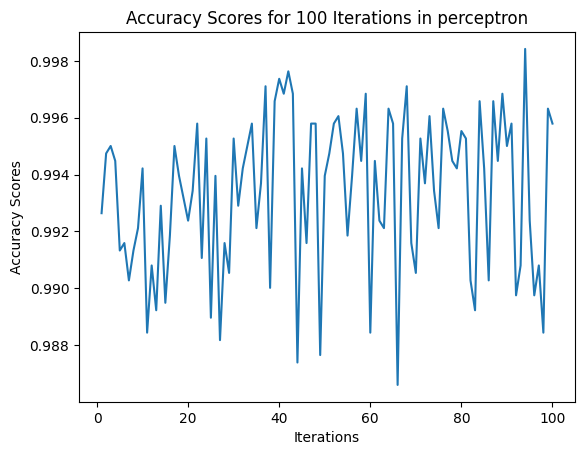

In [53]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_per)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in perceptron")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [34]:
# Calculate the confidence interval in Perceptron model
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 98.7% and 99.7%


In [52]:
from sklearn.utils import resample
# Define the machine learning model
model = SVC(kernel='linear', C=1, random_state=42)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_svc= list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_svc.append(score)

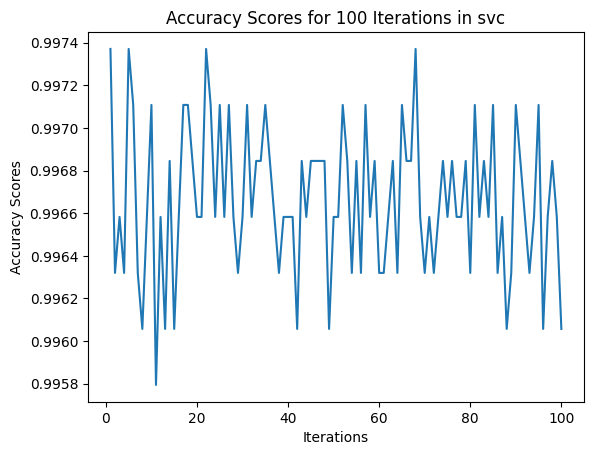

In [54]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_svc)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in svc")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [36]:
# Calculate the confidence interval in a SVM
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 99.6% and 99.7%


In [55]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsClassifier(n_neighbors=3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_knn = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_knn.append(score)

In [38]:
# Calculate the confidence interval IN KNN CLASSIFICATION
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 96.4% and 97.2%


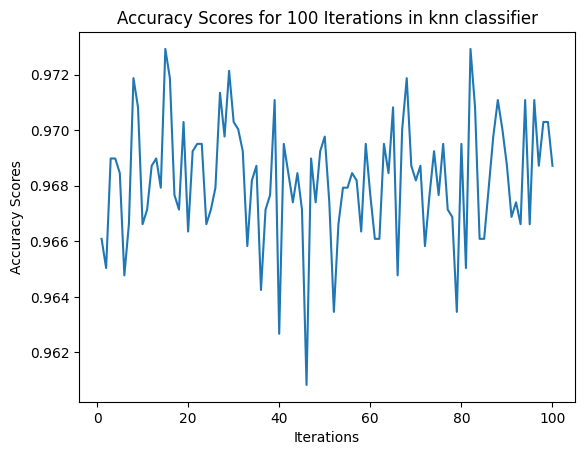

In [56]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_knn)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in knn classifier")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

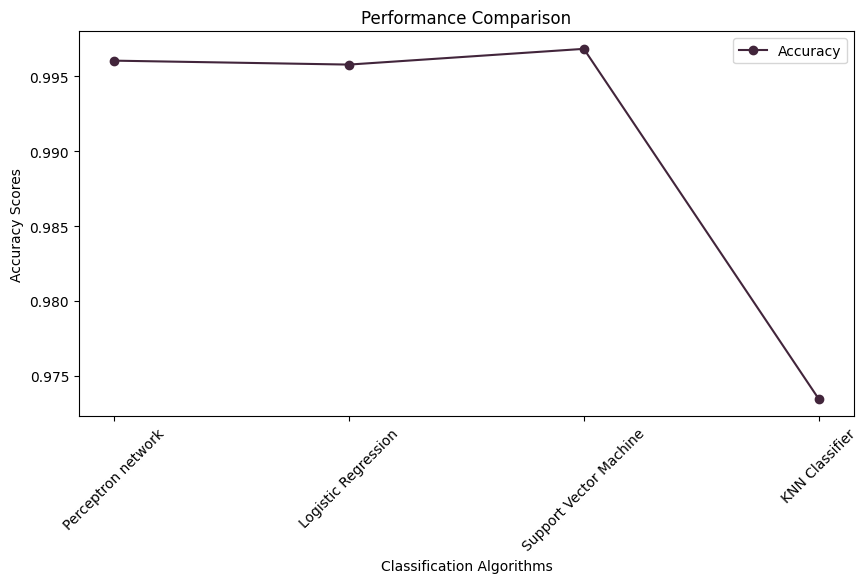

In [40]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine','KNN Classifier']
accuracy_scores = [ accuracy_PM , accuracy_LR , accuracy_SVM,accuracy_KNN ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show()
